In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline
from scipy.stats import gaussian_kde

Analysing the Data

In [3]:
df=pd.read_csv('T1.csv')

# Convert Date/Time column into datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%d %m %Y %H:%M')

# Set index for time-series analysis
df = df.set_index('Date/Time')

In [4]:
df

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50530 entries, 2018-01-01 00:00:00 to 2018-12-31 23:50:00
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LV ActivePower (kW)            50530 non-null  float64
 1   Wind Speed (m/s)               50530 non-null  float64
 2   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 3   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4)
memory usage: 1.9 MB


In [6]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


Task 1

1.	Plot the time-series trend for all four parameters and identify any missing or abnormal readings.

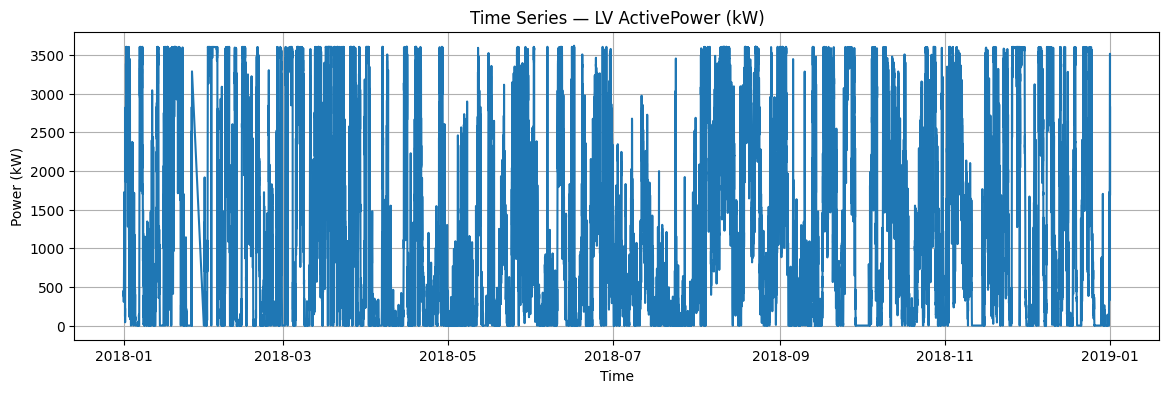

In [7]:
plt.figure(figsize=(14,4))
plt.plot(df.index, df['LV ActivePower (kW)'])
plt.title("Time Series — LV ActivePower (kW)")
plt.xlabel("Time")
plt.ylabel("Power (kW)")
plt.grid(True)
plt.show()


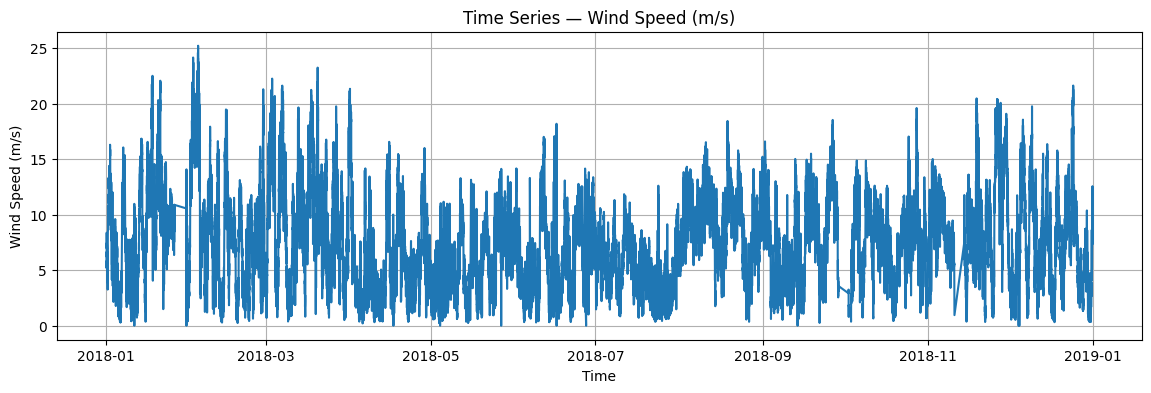

In [8]:

plt.figure(figsize=(14,4))
plt.plot(df.index, df['Wind Speed (m/s)'])
plt.title("Time Series — Wind Speed (m/s)")
plt.xlabel("Time")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.show()


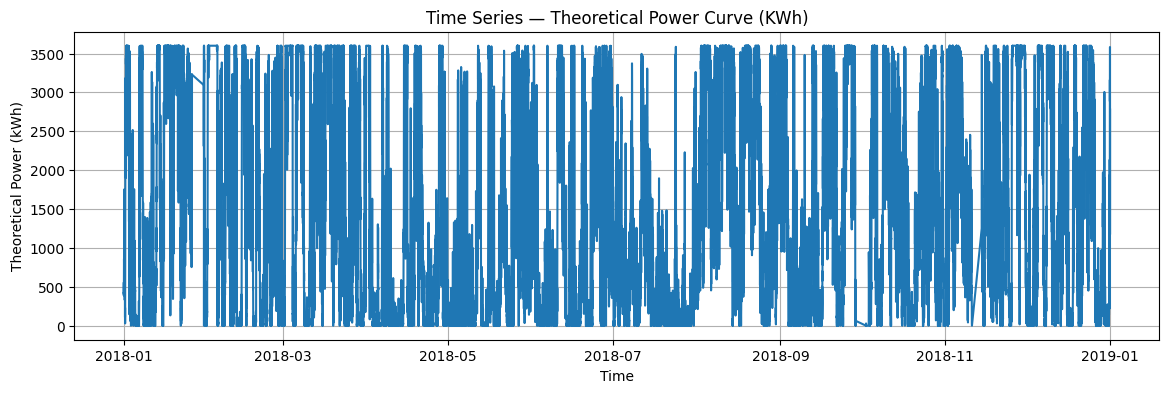

In [9]:

plt.figure(figsize=(14,4))
plt.plot(df.index, df['Theoretical_Power_Curve (KWh)'])
plt.title("Time Series — Theoretical Power Curve (KWh)")
plt.xlabel("Time")
plt.ylabel("Theoretical Power (kWh)")
plt.grid(True)
plt.show()


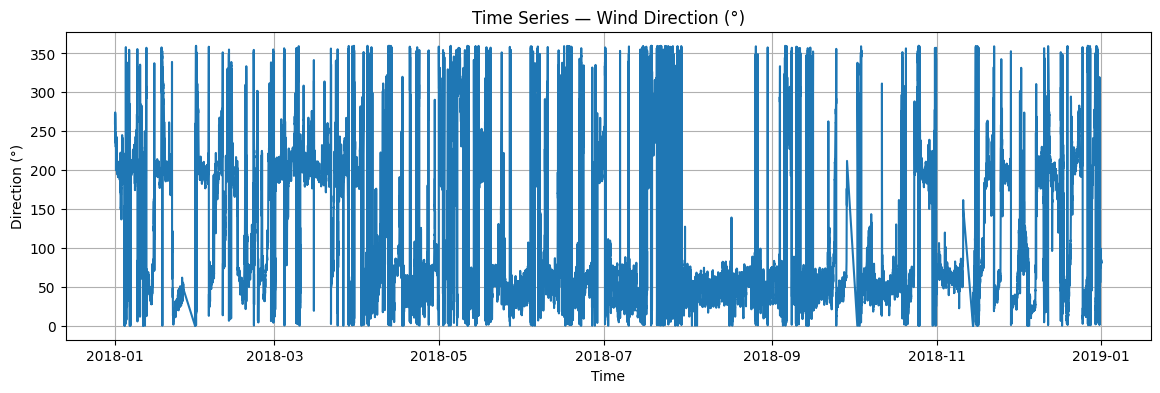

In [10]:

plt.figure(figsize=(14,4))
plt.plot(df.index, df['Wind Direction (°)'])
plt.title("Time Series — Wind Direction (°)")
plt.xlabel("Time")
plt.ylabel("Direction (°)")
plt.grid(True)
plt.show()

2.	Visualize the relationship between Wind Speed and LV ActivePower using a scatterplot to observe the basic power curve behavior.

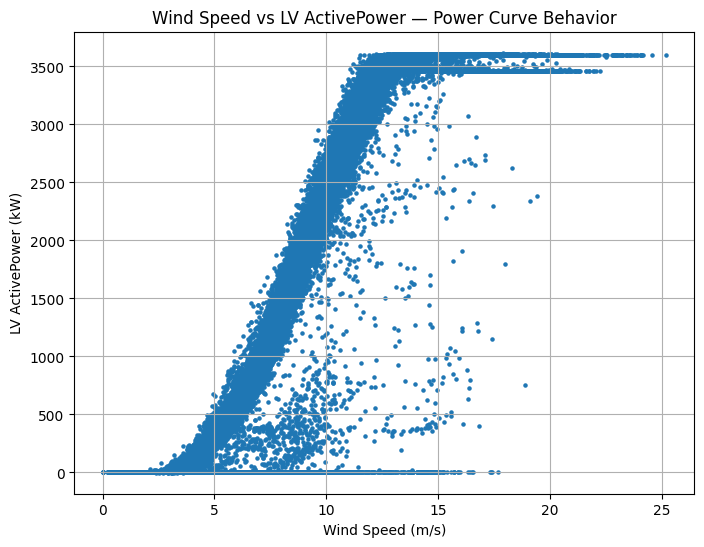

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df['Wind Speed (m/s)'], df['LV ActivePower (kW)'], s=5)
plt.title("Wind Speed vs LV ActivePower — Power Curve Behavior")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("LV ActivePower (kW)")
plt.grid(True)
plt.show()

Binned Average Power Curve

C:\Users\sinth\AppData\Local\Temp\ipykernel_60252\2007124438.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_avg_power = df.groupby('Wind_Bin')['LV ActivePower (kW)'].mean()


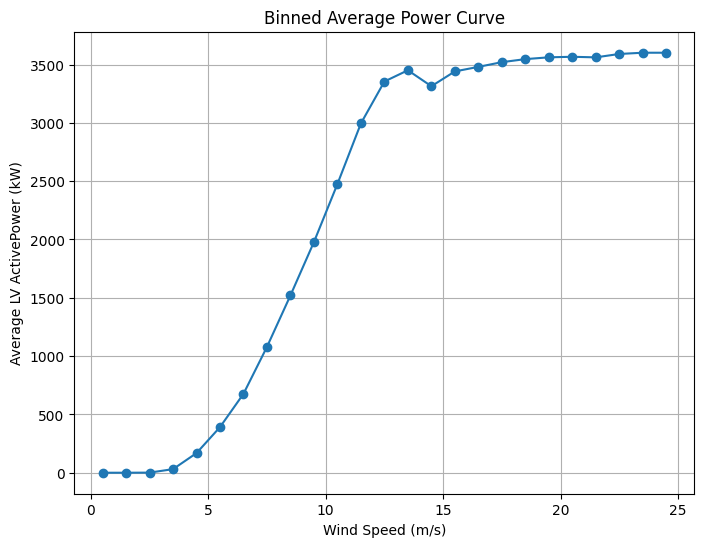

In [16]:
wind = df['Wind Speed (m/s)']
power = df['LV ActivePower (kW)']

# Create 0–25 m/s bins
bins = np.arange(0, 26, 1)
df['Wind_Bin'] = pd.cut(wind, bins)

# Average power for each speed bin
bin_avg_power = df.groupby('Wind_Bin')['LV ActivePower (kW)'].mean()
bin_centers = np.arange(0.5, 25.5, 1)

plt.figure(figsize=(8,6))
plt.plot(bin_centers, bin_avg_power, marker='o')
plt.title("Binned Average Power Curve")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Average LV ActivePower (kW)")
plt.grid(True)
plt.show()